### Assignment 1: projections
- Download the shapefile of world's countries from here: https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp?lang=en&timezone=Europe%2FBerlin

- Download a shapefile of world's urban areas: https://geo.nyu.edu/catalog/stanford-yk247bg4748

While you can download the files and add them in your working directory manually, it is recommended you load them as geopandas data frames from their url's. The addresses for each file are shown below:

In [1]:
import pathlib

DATA_DIRECTORY = pathlib.Path().resolve() / "Exercises" / "Exercise 2"


def save_file_to_disk(url, filename):
    import requests

    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as file:
            file.write(response.content)
        print(f"File downloaded successfully and saved to {filename}")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

In [2]:
# Download and extract the shapefile of world's countries using geopandas
# url for countries
url = "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp?lang=en&timezone=Europe%2FBerlin"
filepath_countries = DATA_DIRECTORY / "world_countries.zip"
save_file_to_disk(url, filepath_countries)

File downloaded successfully and saved to /geopython/Exercises/Exercise 2/world_countries.zip


In [3]:
# Download and extract the shapefile of urban areas
# url for cities
url = "https://stacks.stanford.edu/file/druid:yk247bg4748/data.zip"
filepath_cities = DATA_DIRECTORY / "world_cities.zip"
save_file_to_disk(url, filepath_cities)

File downloaded successfully and saved to /geopython/Exercises/Exercise 2/world_cities.zip


In [4]:
# RUN YOUR CODE HERE

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

gdf_countries = gpd.read_file(filepath_countries)
# gdf_countries.head()

gdf_cities = gpd.read_file(filepath_cities)
# gdf_cities.head()

1) What is the coordinate system of these 2 geodaframes? Use the pyproj library to print the information

In [5]:
#RUN YOUR CODE HERE

import pyproj
# Get the CRS as a pyproj.CRS object
crs_world = pyproj.CRS(gdf_countries.crs)

# Print the properties of the CRS
print(crs_world)

# Get the CRS as a pyproj.CRS object
crs_countries = pyproj.CRS(gdf_countries.crs)

# Print the properties of the CRS
print(crs_countries)


GEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 (G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic System 1984 (G1674)"],MEMBER["World Geodetic System 1984 (G1762)"],MEMBER["World Geodetic System 1984 (G2139)"],ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["Horizontal component of 3D system."],AREA["World."],BBOX[-90,-180,90,180]],ID["EPSG",4326]]
GEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World Geodetic System 1984 (G730)"],MEMBER["World Geodetic 

2) Reproject these two files in a new coordinate system with an EPSG value of 3857.

In [6]:
#RUN YOUR CODE HERE
# Reproject the geopandas dataframes to EPSG 3857
gdf_countries_3857 = gdf_countries.to_crs("EPSG:3857")
gdf_cities_3857 = gdf_cities.to_crs("EPSG:3857")

3) What is their coordinate system now? Use pyproj again to print the reprojected system.

In [7]:
#RUN YOUR CODE HERE

# Get the CRS as a pyproj.CRS object
crs_world_3857 = pyproj.CRS(gdf_countries_3857.crs)
crs_countries_3857 = pyproj.CRS(gdf_countries_3857.crs)

# Print the properties of the CRS
print(crs_world_3857)
print(crs_countries_3857)


PROJCRS["WGS 84 / Pseudo-Mercator",BASEGEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 (G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic System 1984 (G1674)"],MEMBER["World Geodetic System 1984 (G1762)"],MEMBER["World Geodetic System 1984 (G2139)"],ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4326]],CONVERSION["Popular Visualisation Pseudo-Mercator",METHOD["Popular Visualisation Pseudo Mercator",ID["EPSG",1024]],PARAMETER["Latitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["False easting",0,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT[

4) Plot the two files.

<Axes: >

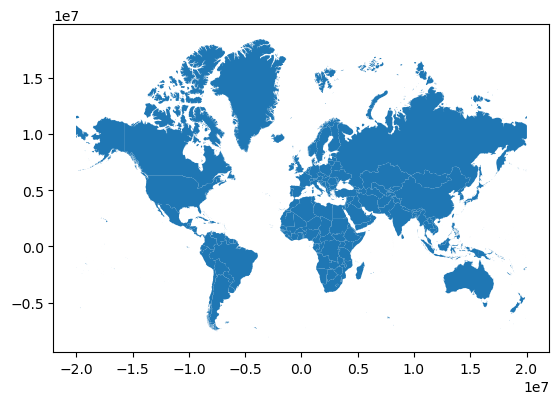

In [8]:
gdf_countries_3857.plot()

<Axes: >

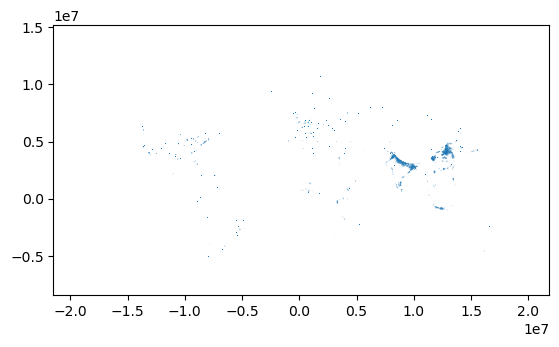

In [9]:
gdf_cities_3857.plot()

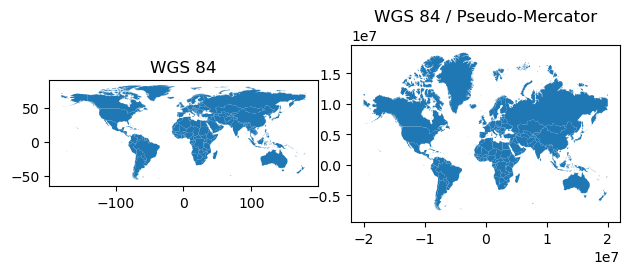

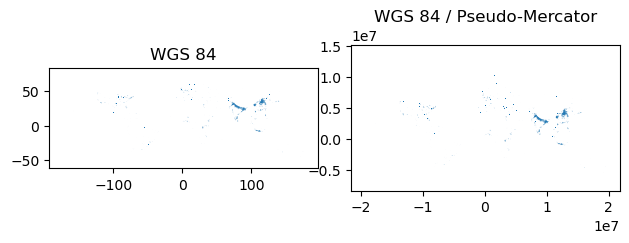

In [10]:
import matplotlib.pyplot

# Prepare sub plots that are next to each other
figure, (axis1, axis2) = matplotlib.pyplot.subplots(nrows=1, ncols=2)

# Plot the original (WGS84, EPSG:4326) data set
gdf_countries.plot(ax=axis1)
axis1.set_title("WGS 84")
axis1.set_aspect(1)

# Plot the reprojected (EPSG:3035) data set
gdf_countries_3857.plot(ax=axis2)
axis2.set_title("WGS 84 / Pseudo-Mercator")
axis2.set_aspect(1)

matplotlib.pyplot.tight_layout()


figure, (axis1, axis2) = matplotlib.pyplot.subplots(nrows=1, ncols=2)

gdf_cities.plot(ax=axis1)
axis1.set_title("WGS 84")
axis1.set_aspect(1)

gdf_cities_3857.plot(ax=axis2)
axis2.set_title("WGS 84 / Pseudo-Mercator")
axis2.set_aspect(1)

matplotlib.pyplot.tight_layout()

5) Save the GeoDataFrames to a a gpkg file

In [11]:
#RUN YOUR CODE HERE

gdf_countries_3857.to_file(DATA_DIRECTORY / "world_countries_3857.gpkg", driver="GPKG")
gdf_cities_3857.to_file(DATA_DIRECTORY / "world_cities_3857.gpkg", driver="GPKG")

Good job! Now, you can move on to the next part!